# Introducción a Pandas

### ¿Qué es Pandas?

En el notebook anterior, se introdujeron los **arrays de Numpy** que, aunque son muy eficientes, tienen limitaciones evidentes cuando necesitamos más flexibilidad como, por ejemplo, adjuntar etiquetas a los datos o trabajar con datos que faltan, para analizar datos menos estructurados disponibles en muchas formas en el mundo que nos rodea.

En este notebook, vamos a examinar en detalle las estructuras de datos **`Series` y `Dataframe` de Pandas**. Pandas es un paquete construido sobre NumPy que proporciona una implementación eficiente de arrays unidimensionales y bidimensionales con etiquetas de filas y columnas adjuntas, tipos de datos heterogéneos y la posibilidad de indicar que un dato falta. Además de ofrecer una implmentación flexible para almacenar datos etiquetados, Pandas proporciona una gran variedad de operaciones sobre los datos que resultarán familiares para aquellos que hayan trabajado con bases de datos y hojas de cálculo. Para ilustrar su uso, utilizaremos ejemplos extraídos de conjuntos de datos reales.

In [1]:
import pandas
pandas.__version__

'2.0.3'

Al igual que NumPy se suele usar con el alias `np`, lo común es importar Pandas con el alias `pd`:

In [1]:

import numpy as np
import pandas as pd

## Introducción a los objetos de Pandas

Los objetos de Pandas pueden considerarse como versiones mejoradas de los arrays de NumPy en los que las filas y columnas se identifican con etiquetas en lugar de simples índices enteros. Como veremos a lo largo de este notebook, Pandas proporciona una gran cantidad de herramientas, métodos y funciones útiles sobre las estructuras de datos básicas, pero casi todo lo que sigue requerirá una comprensión de lo que son estas estructuras. Por lo tanto, vamos a introducir las estructuras de datos fundamentales de Pandas: `Series`, `DataFrame` e `Index`.

### El objeto `Series`

#### Introducción

Un objeto `Series` en Pandas es un array unidimensional de datos indexados. Puede crearse a partir de una lista como se puede ver a continuación:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Como vemos en la salida, la serie contiene tanto una secuencia de valores como una secuencia de índices, a los que podemos acceder con los atributos `values` e `index` respectivamente. Los valores son simplemente una matriz NumPy:

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
type(data.values)

numpy.ndarray

El índice es un objeto tipo array del tipo `pd.Index`, del que hablaremos con más detalle en breve.

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Al igual que con un array de NumPy, se puede acceder a los datos por el índice asociado:

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

Sin embargo, como veremos, el objeto `Series` de Pandas es mucho más general y flexible que el array unidimensional de NumPy en el que se basa.

#### El objeto `Series` como un array de NumPy generalizado

Por lo que hemos visto hasta ahora, puede parecer que el objeto `Series` es básicamente intercambiable con un array unidimensional de NumPy. La diferencia esencial es la presencia del índice: mientras que el array de Numpy tiene un índice entero *implícitamente definido* utilizado para acceder a los valores, el objeto `Series` de Pandas tiene un índice *explícitamente definido* asociado a los valores.

Esta definición explícita del índice proporciona al objeto `Series` capacidades adicionales. Por ejemplo, el índice no tiene por qué ser un entero, sino que puede estar formado por valores de cualquier tipo que se desee.
Por ejemplo, si lo deseamos, podemos utilizar cadenas como índice:

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Y el acceso es como se esperaría:

In [11]:
data['b']

0.5

Incluso podemos usar índices no contiguos o no secuenciales:

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [13]:
data[5]

0.5

#### El objeto `Series` como un diccionario especializado

Se puede pensar en un objeto `Series` de Pandas como una especialización de un diccionario de Python. Mientras que un diccionario es una estructura que asigna claves arbitrarias a un conjunto de valores también arbitrarios, un objeto `Series` es una estructura que asigna claves tipadas a un conjunto de valores tipados. Este tipado es importante porque al igual que el código compilado para un tipo específico que hay detrás de un array de NumPy lo hace más eficiente que una lista de Python para ciertas operaciones, la información de tipo de un objeto `Series` de Pandas la hace mucho más eficiente que los diccionarios de Python para ciertas operaciones.

La analogía entre un objeto `Series` y un diccionario se puede hacer aún más clara construyendo un objeto `Series` directamente desde un diccionario de Python:

In [14]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Por defecto, se creará un objeto `Series` donde el índice se extrae de las claves ordenadas. A partir de aquí, se puede acceder a los elementos como en un diccionario:

In [15]:
population['California']

38332521

Sin embargo, a diferencia de un diccionario, un objeto `Series` también admite operaciones similares a las de un `ndarray` de NumPy:

In [16]:
print(population['Texas':'Florida'])  # Slicing


Texas       26448193
New York    19651127
Florida     19552860
dtype: int64


In [17]:
print(population > 20000000)  # Operación lógica

California     True
Texas          True
New York      False
Florida       False
Illinois      False
dtype: bool


In [18]:
print(population[(population > 20000000) & (population < 30000000)])  # Máscara para acceso selectivo

Texas    26448193
dtype: int64


**NOTA**: Por simplicidad, apartir de ahora nos referiremos a los objetos `Series` simplemente como series.

#### Cómo construir objetos `Series`

Ya hemos visto algunas formas de construir una serie de Pandas desde cero; todas ellas son alguna versión de lo siguiente:

`pd.Series(data, index=index)`

donde `index` es un argumento opcional, y `data` puede ser de diferentes tipos.

* Una lista o un array de NumPy, en cuyo caso `index` es por defecto una secuencia de enteros:

In [19]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

* Un escalar que se repite hasta rellenar el índice:

In [20]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

* Un diccionario en el que el índice serán las claves ordenadas:

In [21]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

### El objeto `DataFrame`

#### Introducción

Al igual que el objeto `Series` discutido en la sección anterior, el objeto `DataFrame` puede ser considerado como una generalización de un array de NumPy, o como una especialización de un diccionario de Python.

#### El objeto `DataFrame` como un array de NumPy generalizado

Si una serie es análoga a un array unidimensional con índices *flexibles*, un `DataFrame` es análogo a un array bidimensional con índices de fila y nombres de columna *flexibles*.

Al igual que se puede pensar en una matriz bidimensional como una secuencia ordenada de columnas unidimensionales alineadas, se puede pensar en un `DataFrame` como una secuencia de objetos `Series` alineados. Por "alineados" entendemos que comparten el mismo índice.

Para demostrarlo, construyamos primero una nueva serie que contenga el área de cada uno de los cinco estados que hemos analizado en la sección anterior:

In [22]:
area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Ahora que tenemos esto junto con la serie `population` de antes, podemos utilizar un diccionario para construir un único objeto bidimensional que contenga esta información:

In [23]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Al igual que el objeto `Series`, `DataFrame` tiene un atributo `index` que da acceso a las etiquetas del índice:

In [24]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Además, el `DataFrame` tiene un atributo `columns`, que es un objeto `Index` que contiene las etiquetas de las columnas:

In [25]:
states.columns

Index(['population', 'area'], dtype='object')

Y otro atributo `values` con todos los valores como un array NumPy:

In [26]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]])

Por lo tanto, el `DataFrame` puede ser visto como una generalización de un array bidimensional de NumPy, donde tanto las filas como las columnas tienen un índice generalizado para acceder a los datos.

#### El objeto `DataFrame` como un diccionario especializado

Del mismo modo, también podemos pensar en un `DataFrame` como una especialización de un diccionario. Mientras que un diccionario asigna una clave a un valor, un `DataFrame` asigna un nombre de columna a una serie de datos de columna. Por ejemplo, el atributo `area` devuelve el objeto `Series` que contiene las áreas que vimos anteriormente:

In [27]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [28]:
states['area']


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

**IMPORTANTE**: Nótese que en un array NumPy de dos dimensiones, `data[0]` devuelve la primera *fila*. Para un `DataFrame`, `data['col0']` (donde `col0` es el nombre de la primera columna) devolverá la primera *columna*.
Por ello, probablemente sea mejor pensar en los `DataFrame` como diccionarios generalizados en lugar de arrays generalizados, aunque ambas perspectivas pueden ser útiles. Exploraremos otras formas de indexar el objeto `DataFrame` más adelante.

#### Cómo construir objetos `DataFrame`

Un `DataFrame` de Pandas puede construirse de varias formas:

##### A partir de una serie

Un `DataFrame` es una colección de objetos `Series`, y un `DataFrame` de una sola columna se puede construir a partir de uno de ellos:

In [29]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


##### A partir de una lista de diccionarios

Cualquier lista de diccionarios puede convertirse en un `DataFrame`:

In [30]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Si faltan algunas claves en el diccionario, Pandas las rellenará con valores `NaN` (es decir, "no es un número"):

In [31]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


##### A partir de un diccionario de objetos `Series`

Como hemos visto antes, un `DataFrame` puede construirse también a partir de un diccionario de objetos `Series`:

In [32]:
pd.DataFrame({'population': population, 'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


##### A partir de un array NumPy de dos dimensiones

Dado un array bidimensional de datos, podemos crear un `DataFrame` con cualquier nombre de columna e índice especificado.
Si se omite, se utilizará un índice entero para cada una:

In [33]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.352678,0.683106
b,0.135512,0.965154
c,0.267652,0.887060


### El objeto `Index`

Hemos visto aquí que tanto los objetos `Series` como `DataFrame` contienen un *índice* explícito que permite referenciar y modificar los datos. Este objeto `Index` es un *array inmutable* o *conjunto ordenado* (técnicamente un multi-conjunto, ya que los objetos `Index` pueden contener valores repetidos). Como ejemplo sencillo, construyamos un objeto `Index` a partir de una lista de enteros:

In [34]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

El objeto `Index` se asemeja en muchos aspectos funciona como un array. Por ejemplo, podemos utilizar la notación de indexación estándar de Python para recuperar valores o slices:

In [35]:
ind[1]

3

In [36]:
ind[::2]

Index([2, 5, 11], dtype='int64')

## Indexación y selección de datos: `loc` e `iloc`

#### Selección de datos en `Series`

Los objetos `Series` pueden tener un índice explícito y otro implícito:

In [37]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [38]:
print(population[0])
print(population['California'])

38332521
38332521


**NOTA**: Cuando se usa *slicing* con un índice explícito (es decir, `datos['a':'c']`), el índice final (`'c'`) está *incluido* en el *slice* mientras que cuando se emplea con un índice implícito (es decir, `datos[0:2]`), el índice final está *excluido* del *slice*.

In [39]:
print(population[0:2])
print(population['California':'Texas'])

California    38332521
Texas         26448193
dtype: int64
California    38332521
Texas         26448193
dtype: int64


Estas convenciones de *slicing* e indexación pueden ser una fuente de confusión. Por ejemplo, si la serie tiene un índice entero explícito, una operación de indexación como `datos[3:'i']` utilizará el índice explícito, mientras que una operación de *slicing* como `datos[1:3]` utilizará el índice implícito de estilo Python:

In [40]:
data = pd.Series(['a', 'b', 'c', 'd'], index=[1, 3, 5, 'i'])
data

1    a
3    b
5    c
i    d
dtype: object

In [41]:
# se usa el índice explícito cuando se indexa
print(data[3])
print(data['i'])

b
d


In [42]:
# se usa el índice implícito cuando se hace slicing
data[1:4]

3    b
5    c
i    d
dtype: object

In [43]:
# también se puede usar el índice explícito cuando se hace slicing
print(data[3:'i'])

3    b
5    c
i    d
dtype: object


Para evitarlo, Pandas proporciona algunos atributos *indexadores* especiales que exponen una interfaz de *slicing* particular para los datos de la serie.

En primer lugar, el atributo `loc` permite la indexación y el *slicing* que siempre hace referencia al índice **explícito**:

In [44]:
data.loc[3]

'b'

In [45]:
data.loc[3:'i']

3    b
5    c
i    d
dtype: object

En segundo lugar, el atributo `iloc` permite la indexación y el *slicing* que siempre hace referencia al índice **implícito** de estilo Python:

In [46]:
data.iloc[3]

'd'

In [47]:
data.iloc[1:4]

3    b
5    c
i    d
dtype: object

Un principio que guía el código Python es que "lo explícito es mejor que lo implícito". La naturaleza explícita de `loc` y `iloc` los hace muy útiles para mantener un código limpio y legible; especialmente en el caso de los índices de enteros, se recomienda usarlos tanto para hacer el código más fácil de leer y entender, como para prevenir errores sutiles debidos a la convención mixta de indexación/slicing.

### Selección de datos en `DataFrame`

Recordemos que un `DataFrame` actúa en muchos aspectos como un array bidimensional, y en otros aspectos como un diccionario de objetos `Series` que comparten el mismo índice. Estas analogías pueden ser útiles mientras exploramos la selección de datos dentro de esta estructura. Volvamos a un DataFrame con la población y el área de algunos estados de EEUU.

In [48]:
area = pd.Series({'California': 423967,
                  'Texas': 695662,
                  'New York': 141297,
                  'Florida': 170312,
                  'Illinois': 149995})
population = pd.Series({'California': 38332521,
                 'Texas': 26448193,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'population':  population})
data

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Añadamos una nueva columna con la densidad de cada estado

In [49]:
data['density'] = data['population'] / data['area']
data

,area,population,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Podemos obtener los valores de un DataFrame como un array de NumPy consultando el atributo `.values`

In [ ]:
data.values

Sin embargo, cuando se trata de la indexación de un objeto `DataFrame`, la indexación de las columnas al estilo de un diccionario impide nuestra capacidad de tratarlo simplemente como un array de NumPy. En particular, al pasar un solo índice a un array se accede a una fila:

In [50]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

y pasando un único "índice" a un `DataFrame` se accede a una columna:

In [51]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Por lo tanto, para la indexación estilo array, necesitamos otra convención. Aquí Pandas vuelve a utilizar los indexadores `loc` e `iloc` mencionados anteriormente.

Usando el indexador `iloc` podemos indexar el array subyacente usando el índice implícito, pero el índice del `DataFrame` y las etiquetas de las columnas se mantienen en el resultado:

In [52]:
data.iloc[:3, :2]

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Del mismo modo, utilizando el indexador `loc` podemos indexar el array subyacente utilizando el índice explícito y los nombres de las columnas, de manera que también se mantienen en el resultado tanto el índice del `DataFrame` como las etiquetas de las columnas:

In [53]:
data.loc[:'Florida', :'population']

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


Con estos atributos *indexadores* se puede utilizar cualquiera de los patrones de acceso a datos que también se usan en NumPy. Por ejemplo:

In [56]:
data.loc[data['density'] > 100, ['population', 'density']]  # data['density'] > 100 filtra filas, mientras que ['population', 'density'] filtra columnas

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


Cualquiera de estas convenciones de indexación también se puede utilizar para establecer o modificar valores:

In [57]:
data.iloc[0, 2] = 90  # modifica la columna 2 ('density') de la fila 0 ('California')
data

,area,population,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [58]:
data.loc['Texas', 'area'] = 70  # modifica la columna 'area' de la fila 'Texas'
data

,area,population,density
California,423967,38332521,90.000000
Texas,70,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Convenciones adicionales de indexación

Hay un par de convenciones de indexación adicionales que pueden parecer contrarias a la discusión anterior.

En primer lugar, mientras el *indexado* trabaja con las columnas, el *slicing* usa las filas:

In [59]:
data['area']

California    423967
Texas             70
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [60]:
data['Florida':'Illinois']   # equivale a data.loc['Florida':'Illinois']

,area,population,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [61]:
data[1:3]   # equivale a data.iloc[1:3]

,area,population,density
Texas,70,26448193,38.018740
New York,141297,19651127,139.076746


En segundo lugar, las operaciones de enmascaramiento directo también se interpretan por filas en lugar de por columnas:

In [ ]:
data[data['density'] > 100]   # equivale a data.iloc[data['density'] > 100]

Estas dos convenciones son sintácticamente similares a las de un array de NumPy, y aunque no se amolden a las convenciones de Pandas, son sin embargo bastante útiles en la práctica.

## Operando con datos en Pandas

Una de las piezas esenciales de NumPy es la capacidad de realizar operaciones rápidas entre elementos, tanto con aritmética básica (suma, resta, multiplicación, etc.) como con operaciones más sofisticadas (funciones trigonométricas, exponenciales, logarítmicas, etc.). Pandas hereda gran parte de esta funcionalidad de NumPy, y las *UFuncs* que introdujimos en el notebook de NumPy son la clave.

Sin embargo, Pandas incluye un par de añadidos útiles. Primero, para las operaciones unarias, como la negación y las funciones trigonométricas, se *preservarán las etiquetas de índice y columna* en la salida, y para las operaciones binarias como la suma y la multiplicación, Pandas *alineará automáticamente los índices* al pasar los objetos a la *UFunc*. Segundo, veremos que hay operaciones bien definidas entre estructuras unidimensionales `Series` y estructuras bidimensionales `DataFrame`.

Como Pandas está diseñado para trabajar con NumPy, cualquier *UFunc* de NumPy funcionará con los objetos `Series` y `DataFrame` de Pandas.
Empecemos definiendo una `Serie` y un `DataFrame` sencillos en los que demostrar esto:

In [62]:
rng = np.random.RandomState(42)  # generador aleatorio inicializado con semilla 42
ser = pd.Series(rng.randint(0, 10, 4))  # usamos el generador para crear la serie aleatoria
ser

0    6
1    3
2    7
3    4
dtype: int64

In [63]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


Si aplicamos una *UFunc* NumPy sobre cualquiera de estos objetos, el resultado será otro objeto Pandas *con los índices y columnas conservados:*

In [65]:
np.exp2(ser)

0     64.0
1      8.0
2    128.0
3     16.0
dtype: float64

In [66]:
np.exp2(df)

,A,B,C,D
0,64.0,512.0,4.0,64.0
1,128.0,16.0,8.0,128.0
2,128.0,4.0,32.0,16.0


También podemos hacer cálculos algo más complejos:

In [67]:
np.sin(ser * np.pi / 4)

0   -1.000000e+00
1    7.071068e-01
2   -7.071068e-01
3    1.224647e-16
dtype: float64

In [68]:
np.sin(df * np.pi / 4)   # np.pi = 3.14159265

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


Por otro lado, si aplicamos una UFunc a dos objetos `DataFrame`:

In [69]:
df1 = pd.DataFrame(rng.randint(0, 10, (3, 2)),
                  columns=['A', 'B'])
print(df1)
df2 = pd.DataFrame(rng.randint(0, 10, (3, 2)),
                  columns=['A', 'B'])
print(df2)


   A  B
0  1  7
1  5  1
2  4  0
   A  B
0  9  5
1  8  0
2  9  2


In [70]:
df1 + df2

,A,B
0,10,12
1,13,1
2,13,2


Si los dos objetos `DataFrame` no tienen las mismas dimensiones:

In [71]:
df2 = pd.DataFrame(rng.randint(0, 10, (4, 3)),
                  columns=['A', 'B', 'C'])
print(df2)

   A  B  C
0  6  3  8
1  2  4  2
2  6  4  8
3  6  1  3


In [72]:
df1 + df2

,A,B,C
0,7.0,10.0,NaN
1,7.0,5.0,NaN
2,10.0,4.0,NaN
3,NaN,NaN,NaN


## NaN y None en Pandas

Tanto `NaN` como `None` se pueden usar en Pandas indistintamente, convirtiendo entre ellos cuando sea apropiado:

In [73]:
ser = pd.Series([1, np.nan, 2.0, None])
ser

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Como hemos visto, Pandas trata `None` y `NaN` como esencialmente intercambiables para indicar valores perdidos o nulos.
Para facilitar esta convención, existen varios métodos útiles para detectar, eliminar y reemplazar valores nulos en las estructuras de datos de Pandas.
Estos son:

- `isnull()`: Genera una máscara booleana que indica los valores perdidos
- `notnull()`: Lo contrario de `isnull()`
- `dropna()`: Devuelve una versión filtrada de los datos
- `fillna()`: Devuelve una copia de los datos con los valores perdidos rellenados o imputados

Concluiremos esta sección con una breve demostración de estas rutinas.

In [74]:
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [75]:
ser[ser.notnull()]

0    1.0
2    2.0
dtype: float64

`dropna()` elimina las filas con valores NA

In [76]:
ser.dropna()

0    1.0
2    2.0
dtype: float64

Sin embargo, para un `DataFrame`, hay más opciones. Consideremos el siguiente `DataFrame`:

In [77]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


No podemos eliminar valores individuales de un `DataFrame`; sólo podemos eliminar filas o columnas completas.
Dependiendo de la aplicación, se puede querer una cosa u otra, por lo que `dropna()` ofrece varias posibilidades para un `DataFrame`.
Por defecto, `dropna()` eliminará todas las filas en las que esté presente *cualquier* valor nulo:

In [78]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternativamente, puede eliminar todas las columnas que contienen un valor nulo:

In [79]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


A veces, en lugar de eliminar los valores NA, se prefiere sustituirlos por un valor válido.
Este valor podría ser un número único como el cero o  la interpolación de los valores existentes.
Se podría hacer esto asignando un valor a una selección de valores usando el método `isnull()` como máscara, pero como es una operación tan común Pandas proporciona el método `fillna()`, que devuelve una copia del array con los valores nulos reemplazados. Por ejemplo, podemos sustituir los NaN por 0:

In [80]:
df.fillna(0)

,0,1,2
0,1.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


In [81]:
ser.fillna(0)

0    1.0
1    0.0
2    2.0
3    0.0
dtype: float64

## Agregación y agrupamiento

Una pieza esencial en el análisis de grandes datos es la obtención eficiente de resúmenes. Pandas permite calcular fñacilmente agregaciones como `sum()`, `mean()`, `median()`, `min()` y `max()`, en las que un solo número da una idea de la naturaleza de un conjunto de datos potencialmente grande.
**En esta sección, exploraremos las agregaciones en Pandas, desde operaciones simples similares a las que hemos visto en los arrays de NumPy, hasta operaciones más sofisticadas basadas en el concepto de un `groupby`.**

In [98]:
planets = pd.read_csv('data/planets.csv')

In [83]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Pandas permite la visualización de datos de una forma muy sencilla. Por ejemplo, si queremos obtener un histograma de las masas de los diferentes planetas podemos hacer lo siguiente:

In [102]:
planets[planets['mass']==planets['mass'].max()]

,method,number,orbital_period,mass,distance,year
321,Radial Velocity,1,2371.0,25.0,37.05,2008


<Axes: >

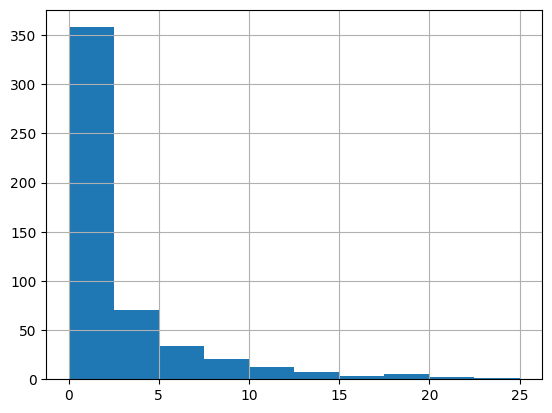

In [103]:
planets['mass'].hist()

Pero también podríamos haber hecho esto:

array([[<Axes: title={'center': 'mass'}>]], dtype=object)

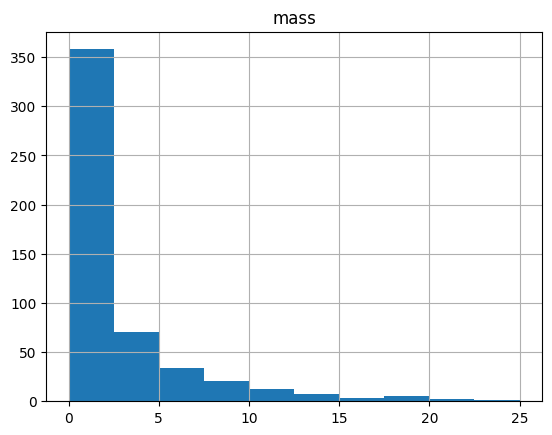

In [86]:
planets.hist('mass')

### Agregación simple con Pandas

Para una `Serie` de Pandas los agregados devuelven un único valor:

In [87]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [88]:
print(ser.sum(), ser.mean(), ser.median(), ser.min(), ser.max())

2.811925491708157 0.5623850983416314 0.5986584841970366 0.15601864044243652 0.9507143064099162


Para un `DataFrame`, la agregación devuelve resultados por columna:

In [104]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [105]:
print(df.sum(), df.mean(), df.median(), df.min(), df.max())

A    2.389442
B    2.217101
dtype: float64 A    0.477888
B    0.443420
dtype: float64 A    0.601115
B    0.212339
dtype: float64 A    0.058084
B    0.020584
dtype: float64 A    0.866176
B    0.969910
dtype: float64


Hay un método llamado `describe()` que calcula varios agregados comunes para cada columna y devuelve el resultado.
Usémoslo en los datos de Planetas, por ahora eliminando las filas con valores no asignados:

In [106]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Esta puede ser una forma útil de empezar a entender las propiedades generales de un conjunto de datos. Por ejemplo, en la columna `year` vemos que, aunque ya se descubrieron exoplanetas en 1989, la mitad de los conocidos no se descubrieron hasta 2010 o después.

La siguiente tabla resume algunas agregaciones útiles en pandas tanto para `Series` como para `DataFrames`:

| Agregación           | Descripción                          |
|----------------------|--------------------------------------|
| `count()`            | Número total de items                |
| `first()`, `last()`  | Primer y último item respectivamente |
| `mean()`, `median()` | Media y mediana                      |
| `min()`, `max()`     | Mínimo y máximo                      |
| `std()`, `var()`     | Desviación estándar y varianza       |
| `prod()`             | Producto de todos los items          |
| `sum()`              | Suma de todos los items              |

Sin embargo, para profundizar en los datos, los agregados simples no suelen ser suficientes.
El siguiente nivel es la operación `groupby`, que permite calcular agregados sobre subconjuntos de datos.

### `groupby`: Dividir, aplicar, combinar

Las agregaciones simples pueden darnos una idea de nuestro conjunto de datos, pero a menudo preferiremos agregar condicionalmente con la operación `groupby`.
El nombre "group by" proviene del lenguaje de bases de datos SQL, pero quizás sea más ilustrativo pensar en él en los términos acuñados por Hadley Wickham de Rstats: *dividir, aplicar, combinar*.

Un ejemplo canónico de esta operación de dividir-aplicar-combinar, donde el "aplicar" es una agregación de suma, se ilustra en esta figura:

![](figures/03.08-split-apply-combine.png)

Los pasos de la operación `groupby` hacen lo siguiente:

- El paso *split* implica dividir y agrupar un `DataFrame` dependiendo del valor de la clave especificada.
- El paso *apply* implica el cálculo de alguna función, normalmente un agregado, transformación o filtro, dentro de los grupos individuales.
- El paso *combinar* fusiona los resultados de las operaciones anteriores.

Aunque estos pasos podría hacerse manualmente utilizando alguna combinación de las operacoines descritas anteriormente, es importante resaltar que *las divisiones intermedias no necesitan ser instanciadas explícitamente*, es decir, `groupby` no sólo es más eficiente sino que permite pensar en la *operación como un todo*.

In [107]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


La operación más básica de dividir-aplicar-combinar se puede calcular con el método `groupby()` de `DataFrame` pasando el nombre de la columna deseada:

In [110]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


El método `sum()` se puede sustituir por cualquier función de agregación común de Pandas o NumPy, así como prácticamente cualquier operación válida de `DataFrame`, como veremos a continuación.

### El objeto `GroupBy`

El objeto `GroupBy` que devuelve la operación `groupby` es una abstracción muy flexible que puede considerarse como una colección de `DataFrame`s.

Las operaciones más importantes que ofrece un `GroupBy` son *agregación*, *filtro*, *transformación* y *aplicación*.

El objeto `GroupBy` soporta la indexación de columnas de la misma manera que el `DataFrame`.
Por ejemplo, aquí vemos cómo agrupamos los datos de los planetas por el método de detección y mostramos la mediana del periodo orbital de cada subgrupo:

In [113]:
print(planets.head())
planets.groupby('method')['orbital_period'].median() # agrupa por método y calcula la mediana de los periodos orbitales

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Esto da una idea de la escala general de períodos orbitales (en días) a la que es sensible cada método.

### Agregar, filtrar, transformar, aplicar

Los objetos `GroupBy` tienen los métodos `agregate()`, `filter()`, `transform()`, y `apply()` que implementan eficientemente una variedad de operaciones útiles antes de combinar los datos agrupados.

En las siguientes subsecciones utilizaremos este `DataFrame`:

In [114]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### El método `aggregate()`

Permite calcular varios agregados a la vez. Por ejemplo, el mínimo, la mediana y el máximo:

In [115]:
df.groupby('key').aggregate(['min', np.median, 'max'])  # puedes usar cadenas o las funciones de NumPy

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

#### El método `filter()`

Permite descartar datos en función de las propiedades del grupo. Por ejemplo, podríamos querer mantener todos valores de los grupos en los que la desviación estándar es mayor que algún valor crítico:

In [116]:
df.groupby('key')['data2'].std()

key
A    1.414214
B    4.949747
C    4.242641
Name: data2, dtype: float64

In [117]:
df.groupby('key').filter(lambda x: x['data2'].std() > 4)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


La función de filtrado debe devolver un valor booleano que especifica si el grupo pasa el filtrado. En este caso, aquellos valores de grupos que no tengan una desviación estándar superior a 4 en `data2`, se eliminan del resultado.

#### El método `transform()`

Permite transformar los datos de los grupos. Un ejemplo común es normalizar los datos restando la media del grupo:

In [118]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [119]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


La función de transformación genera una salida similar a la entrada.

#### El método `apply()`

Permite aplicar una función arbitraria a los resultados del grupo. La función debe aceptar un objeto `Series` o un `DataFrame`, y devolver un objeto `Series`, `DataFrame` o un escalar, independientemente del objeto de entrada. Además, la operación de combinación se adaptará al tipo de resultado devuelto.

En el siguiente ejemplo, se normaliza la primera columna a partir de la suma de los elementos de la segunda columna del mismo grupo:

In [121]:
def norm_by_data2(x):
    # x es un Dataframe devuelto por groupby, es decir, agrupado por valores
    x['data1'] /= x['data2'].sum() # normaliza data1 por la suma de data2
    return x

In [123]:
print(df)
df.groupby('key', group_keys=False).apply(norm_by_data2)

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


## Referencias

* [Pandas](https://pandas.pydata.org/docs/index.html)
  * [Numpy · Getting Started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
  * [Numpy · API Reference](https://pandas.pydata.org/docs/reference/index.html)